<a href="https://colab.research.google.com/github/igorpontes/GLO-7050/blob/develop/mini_projet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini-projet 1**

Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**1 Sélection de modèle**

In [4]:
#import CSV file and chose only the two first columns
ds1_train = np.loadtxt("Dataset_1_train.csv", delimiter=",", usecols=range(2))
ds1_test = np.loadtxt("Dataset_1_test.csv", delimiter=",", usecols=range(2))
ds1_valid = np.loadtxt("Dataset_1_valid.csv", delimiter=",", usecols=range(2))
#print(ds1_train)
#print(" ------------------------------------")
#my_data = np.genfromtxt('Dataset_1_train.csv', delimiter=',', dtype= float)[:,:-1]
#print(my_data)

Separate points

In [5]:
ds1_train_X = ds1_train[:,0]
ds1_train_Y = ds1_train[:,1]

ds1_test_X = ds1_test[:,0]
ds1_test_Y = ds1_test[:,1]

ds1_valid_X = ds1_valid[:,0]
ds1_valid_Y = ds1_valid[:,1]

Plotting dataset

In [6]:
def plotting_points(x , y, title):
  plt.figure(figsize=(10, 5))
  plt.scatter(x, y, s=15)
  plt.title(title)
  plt.xlabel('Predictor')
  plt.ylabel('Target')
  plt.show()

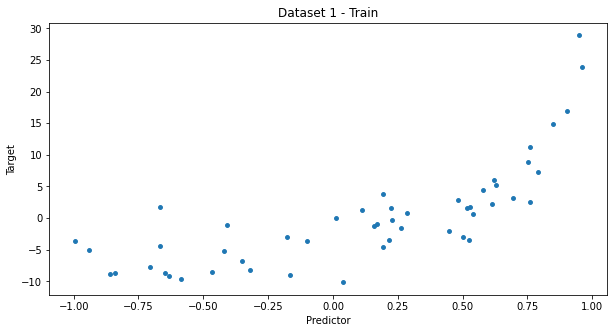

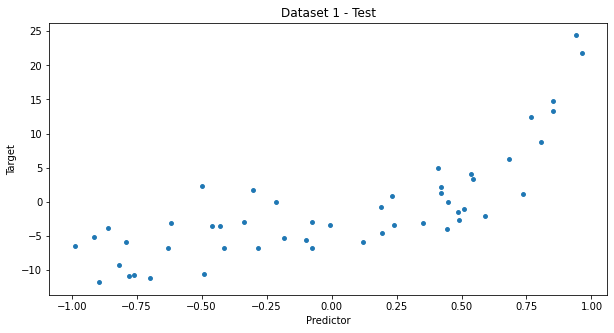

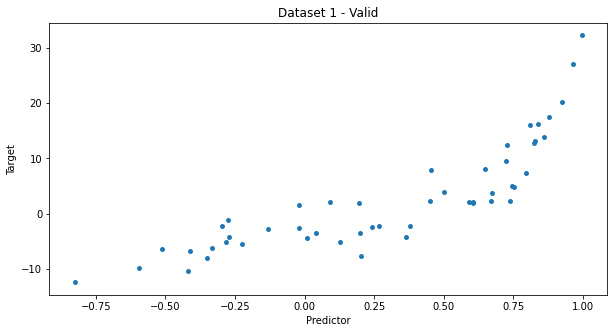

In [7]:
plotting_points(ds1_train_X, ds1_train_Y, "Dataset 1 - Train")
plotting_points(ds1_test_X, ds1_test_Y, "Dataset 1 - Test")
plotting_points(ds1_valid_X, ds1_valid_Y, "Dataset 1 - Valid")

In [8]:
def get_vandermonde_matrix(ds, degree):
  return np.polynomial.polynomial.polyvander(ds, degree)


In [9]:
# Train Algorithm (Polynomial)
degree = 20
#create matrix of Vandermonde to make the regression
matrix_X = get_vandermonde_matrix(ds1_train_X, degree)
print("Vander 1")
print(matrix_X)

matrix_X = np.asmatrix(matrix_X)
# transpose matrix X 
matrix_X_T = matrix_X.getT()

matrix_Y = np.asmatrix(ds1_train_Y)



Vander 1
[[ 1.00000000e+00  5.16219704e-01  2.66482783e-01 ...  6.77676462e-06
   3.49829943e-06  1.80589110e-06]
 [ 1.00000000e+00  8.50084539e-01  7.22643724e-01 ...  5.37425310e-02
   4.56856947e-02  3.88367027e-02]
 [ 1.00000000e+00 -8.40628530e-01  7.06656326e-01 ...  4.39414374e-02
  -3.69384260e-02  3.10514947e-02]
 ...
 [ 1.00000000e+00 -4.09602171e-01  1.67773939e-01 ...  1.05322340e-07
  -4.31402593e-08  1.76703439e-08]
 [ 1.00000000e+00  7.59964631e-01  5.77546240e-01 ...  7.14958527e-03
   5.43343193e-03  4.12921609e-03]
 [ 1.00000000e+00 -9.96608561e-01  9.93228625e-01 ...  9.40682461e-01
  -9.37492194e-01  9.34312747e-01]]


In [86]:
x = ds1_train[:,0]
y = ds1_train[:,1]
# Vandermonde matrix
X = get_vandermonde_matrix(x, 20)

def calc_beta(X, y):
  # matrix algebra
  b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  #b = np.linalg.solve((X.T @ X),X.T @ y)
  return b

print(calc_beta(X, y))

[-3.89819804e+00 -1.56004217e+01  1.56668178e+02  1.91638938e+03
 -7.78666565e+03 -3.58695279e+04  1.27847040e+05  2.91244886e+05
 -1.00693580e+06 -1.25990128e+06  4.41120425e+06  3.17638960e+06
 -1.15170491e+07 -4.81333365e+06  1.83364905e+07  4.31102403e+06
 -1.74538833e+07 -2.09774318e+06  9.12455198e+06  4.26150106e+05
 -2.01476218e+06]


In [88]:
beta = calc_beta(X, y)
beta = np.asmatrix(beta).T
# Predict y
y_pred = X*beta
#print(y_pred)


[[  0.16227677]
 [ 14.53359703]
 [ -9.08578332]
 [ -0.17976708]
 [ -5.189006  ]
 [  4.24901634]
 [ -0.69284706]
 [ -6.7949865 ]
 [ -0.11180687]
 [ -2.53579262]
 [ -0.14187898]
 [  6.40444214]
 [  9.01824073]
 [ -3.01975643]
 [  2.3116938 ]
 [  6.02848629]
 [ -6.68683427]
 [ -5.9755903 ]
 [ -1.06814684]
 [ -0.28153107]
 [ -7.60246176]
 [ -5.08100286]
 [ 23.86900821]
 [  0.74765744]
 [ -0.44989611]
 [ -4.34116965]
 [ -8.57661402]
 [ -7.4128056 ]
 [ -0.1699315 ]
 [  3.88558467]
 [ -4.04039237]
 [ -0.90526492]
 [ -4.46344264]
 [  6.63341439]
 [ -4.4676819 ]
 [ -0.98386733]
 [ -0.60979293]
 [ 28.98539514]
 [ 16.93555522]
 [ -4.17470668]
 [  0.39789587]
 [ -5.67151814]
 [ -0.26459441]
 [-11.17731303]
 [  0.43665392]
 [ -5.84375289]
 [  4.66071493]
 [ -4.04179009]
 [  6.70317015]
 [ -3.60496793]]


In [96]:
def mean_square_error(Y_true, Y_pred):
  return np.square(np.subtract(Y_true,Y_pred)).mean() 

In [97]:
print(mean_square_error(y, y_pred.A1))

6.4747564103155035


In [73]:
#y transposed for the calculus of beta_vector
y = np.matrix(ds1_train[:,1])
#create matrix of Vandermonde to make the regression
N = 20
matrix_X=np.polynomial.polynomial.polyvander(np.array(x), N)
# create matrix X and X transposed
matrix_X = np.asmatrix(matrix_X)
#print(matrix_X)
matrix_X_T=matrix_X.getT()


#calcul of beta vector
# coloquei o .T para o y ficar no formato de vetor-coluna

beta=((matrix_X_T*matrix_X).getI())*matrix_X_T*y.T
print(beta)
y_poly_pred = matrix_X*beta

#print('1',y_poly_pred)
print(y_poly_pred)
#print('------')
y_poly_pred = np.asarray(y_poly_pred)

print(y_poly_pred)

[[-3.89819804e+00]
 [-1.56004217e+01]
 [ 1.56668178e+02]
 [ 1.91638938e+03]
 [-7.78666565e+03]
 [-3.58695279e+04]
 [ 1.27847040e+05]
 [ 2.91244886e+05]
 [-1.00693580e+06]
 [-1.25990128e+06]
 [ 4.41120425e+06]
 [ 3.17638960e+06]
 [-1.15170491e+07]
 [-4.81333365e+06]
 [ 1.83364905e+07]
 [ 4.31102403e+06]
 [-1.74538833e+07]
 [-2.09774318e+06]
 [ 9.12455198e+06]
 [ 4.26150106e+05]
 [-2.01476218e+06]]
[[  0.16227677]
 [ 14.53359703]
 [ -9.08578332]
 [ -0.17976708]
 [ -5.189006  ]
 [  4.24901634]
 [ -0.69284706]
 [ -6.7949865 ]
 [ -0.11180687]
 [ -2.53579262]
 [ -0.14187898]
 [  6.40444214]
 [  9.01824073]
 [ -3.01975643]
 [  2.3116938 ]
 [  6.02848629]
 [ -6.68683427]
 [ -5.9755903 ]
 [ -1.06814684]
 [ -0.28153107]
 [ -7.60246176]
 [ -5.08100286]
 [ 23.86900821]
 [  0.74765744]
 [ -0.44989611]
 [ -4.34116965]
 [ -8.57661402]
 [ -7.4128056 ]
 [ -0.1699315 ]
 [  3.88558467]
 [ -4.04039237]
 [ -0.90526492]
 [ -4.46344264]
 [  6.63341439]
 [ -4.4676819 ]
 [ -0.98386733]
 [ -0.60979293]
 [ 28.98

In [ ]:
# Train Algorithm (Polynomial)
degree = 20
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

NameError: ignored

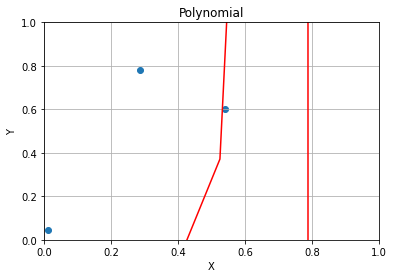

-7.315346113820354e+27


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ds1_train_X
Y = ds1_train_Y

# Train Algorithm (Polynomial)
degree = 20
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plot data
xx = np.linspace(0, 26, 100)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.scatter(X, Y)
plt.show()

# Predict price
print( poly_fit(12) )

**2 Descente de gradient pour la régression**



In [ ]:
#import CSV file and chose only the two first columns
ds2_train = np.loadtxt("Dataset_2_train.csv", delimiter=",", usecols=range(2))
ds2_test = np.loadtxt("Dataset_2_test.csv", delimiter=",", usecols=range(2))
ds2_valid = np.loadtxt("Dataset_2_valid.csv", delimiter=",", usecols=range(2))

**3 Dataset issu de la "vie réelle"**

In [ ]:
#import CSV file and chose only the two first columns
ds3 = np.genfromtxt("communities.data", delimiter=",", dtype="str")

In [ ]:
print(ds3[1])

['53' '?' '?' 'Tukwilacity' '1' '0' '0.16' '0.12' '0.74' '0.45' '0.07'
 '0.26' '0.59' '0.35' '0.27' '0.02' '1' '0.31' '0.72' '0.11' '0.45' '0.25'
 '0.29' '0.39' '0.29' '0.37' '0.38' '0.33' '0.16' '0.3' '0.22' '0.35'
 '0.01' '0.24' '0.14' '0.24' '0.3' '0.27' '0.73' '0.57' '0.15' '0.42'
 '0.36' '1' '0.63' '0.91' '1' '0.29' '0.43' '0.47' '0.6' '0.39' '0.46'
 '0.53' '0' '0.24' '0.01' '0.52' '0.62' '0.64' '0.63' '0.25' '0.27' '0.25'
 '0.23' '0.84' '0.1' '0.16' '0.1' '0.17' '0.29' '0.17' '0.26' '0.2' '0.82'
 '0' '0.02' '0.79' '0.24' '0.02' '0.25' '0.65' '0.16' '0' '0.21' '0.2'
 '0.21' '0.42' '0.38' '0.4' '0.37' '0.29' '0.32' '0.18' '0' '0' '0.21'
 '0.5' '0.34' '0.6' '0.52' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?'
 '?' '?' '?' '?' '?' '0.02' '0.12' '0.45' '?' '?' '?' '?' '0' '?' '0.67']
